In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import math

In [31]:
df1=pd.read_csv('social_network.csv')

In [32]:
df1.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [33]:
df1.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [34]:
n=len(df1["Age"])
x=np.asarray(df1[["Age"]])
y=np.asarray(df1.Purchased)
lr=LogisticRegression().fit(x,y)
y_hat=lr.predict_proba(x)
print(lr.score(x,y))
print("n=",n)

0.84
n= 400


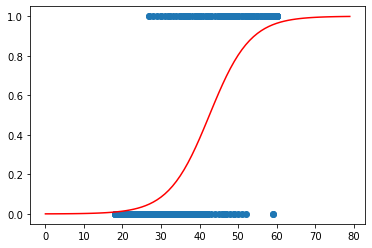

In [35]:
x1=[]
y1=[]
beta0=lr.intercept_
beta1=lr.coef_[0]
x_range=80
for i in range(x_range):
    x1.append(i)
    z=beta0+i*beta1
    f=math.exp(z)/(1+math.exp(z))
    y1.append(f)
plt.scatter(df1["Age"],df1["Purchased"])
plt.plot(x1,y1,color="red")

    
    

In [36]:
rdyhat=lr.predict(x)
cm=metrics.confusion_matrix(y,rdyhat)
print(cm)

[[239  18]
 [ 46  97]]


In [41]:
print("TN in percentage",(cm[0][0]/n)*100)
print("TP in percentage",(cm[0][1]/n)*100)
print("FN in percentage",(cm[1][0]/n)*100)
print("FP in percentage",(cm[1][1]/n)*100)
print("Accuracy is",(cm[0][0]+cm[1][1])/n*100)
print("Total precision",(cm[0][1]+cm[1][1])/n*100)
a=cm[0][0]+cm[1][1]
e=n-a
print("Error rate is",e/n*100)


TN in percentage 59.75
TP in percentage 4.5
FN in percentage 11.5
FP in percentage 24.25
Accuracy is 84.0
Total precision 28.749999999999996
